In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Generate dataset
X, y = make_classification(n_samples=800, n_features=2, n_redundant=0, 
                          n_informative=2, n_clusters_per_class=2,
                          flip_y=0.1, class_sep=1.0, random_state=42)

## __Voting Mechanisms__

In [2]:
models = [
    ("Logistic Regression", LogisticRegression(C=1.0, random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(max_depth=4, random_state=42)),
    ("SVM", SVC(kernel="rbf", probability=True, random_state=42)),
    ("K-NN", KNeighborsClassifier(n_neighbors=7))
]

# Voting Mechanisms
voting_methods = {
    "Hard Voting": VotingClassifier(models, voting="hard"),
    "Soft Voting": VotingClassifier(models, voting="soft"),
    "Weighted Voting": VotingClassifier(models, voting="soft", weights=[1, 2, 1, 1])
}

## __Results and Accuracy__

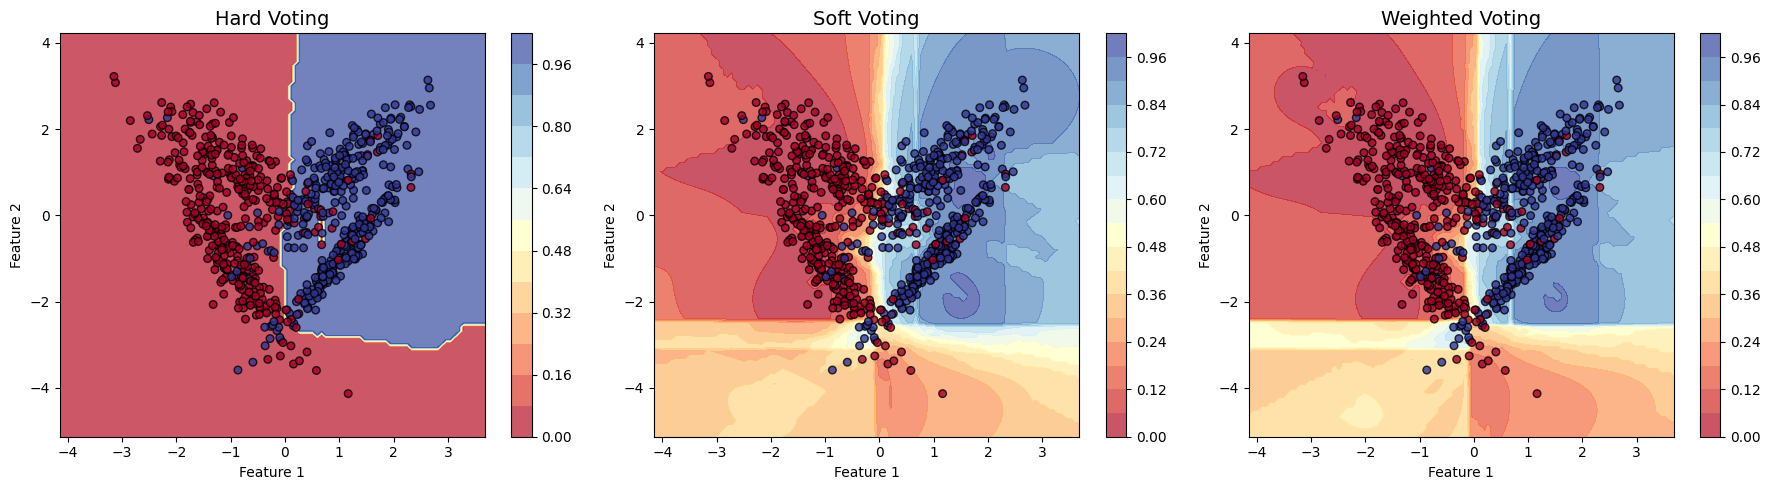

Voting Mechanisms Accuracies
------------------------------
Hard Voting: 0.9012
Soft Voting: 0.9137
Weighted Voting: 0.9150


In [3]:
# Mesh for decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for idx, (voting_name, voting_clf) in enumerate(voting_methods.items()):
    voting_clf.fit(X, y)
    y_pred = voting_clf.predict(X)
    # Decision boundary
    if hasattr(voting_clf, "predict_proba"):
        Z = voting_clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    else:
        Z = voting_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot
    ax = axes[idx]
    contour = ax.contourf(xx, yy, Z, alpha=0.7, levels=15, cmap="RdYlBu")
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap="RdYlBu", alpha=0.8, edgecolors="black", s=30)
    ax.set_title(voting_name, fontsize=14)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    plt.colorbar(contour, ax=ax)

plt.tight_layout()
plt.savefig("./figures/voting_mechanisms.png")
plt.show()


print("Voting Mechanisms Accuracies")
print("-"*30)
for idx, (voting_name, voting_clf) in enumerate(voting_methods.items()):
    # Calcular accuracy
    y_pred = voting_clf.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print(f"{voting_name}: {accuracy:.4f}")